# Modelagem e simulação

Roberto M. Cesar Jr. - IME - USP

rmcesar@usp.br

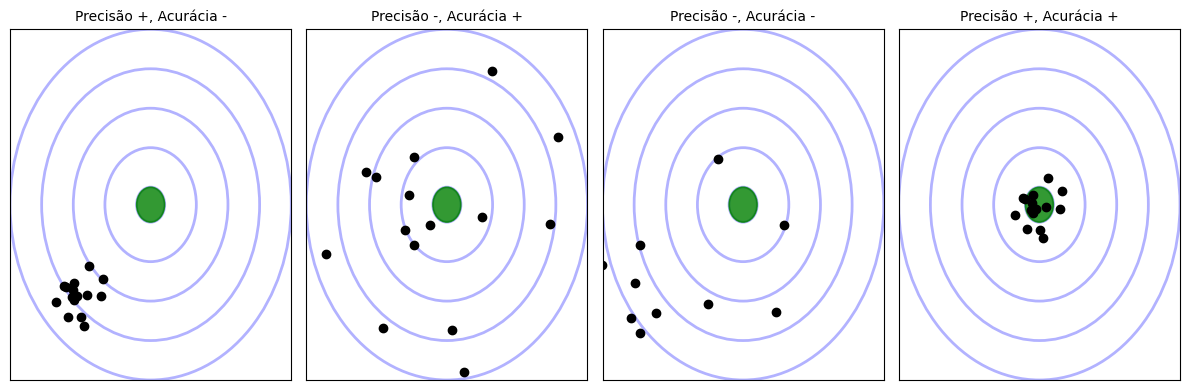

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Função para desenhar um alvo
def draw_target(ax, center):
    for r in np.linspace(0.1, 1, 5):
        ax.add_patch(plt.Circle(center, r, color='blue', alpha=0.3, lw=2, fill=False))
    ax.add_patch(plt.Circle(center, 0.1, color='green', alpha=0.8, fill=True))  # Centro do alvo

# Gerar pontos simulando precisão e acurácia
def generate_points(center, spread, accuracy_offset):
    np.random.seed(42)  # Garantir reprodutibilidade
    return center + np.random.normal(accuracy_offset, spread, (15, 2))

# Criando a figura
fig, axes = plt.subplots(1, 4, figsize=(12, 4))

# Definição dos alvos
centers = [(0, 0), (3, 0), (6, 0), (9, 0)]
titles = [
    "Precisão +, Acurácia -",
    "Precisão -, Acurácia +",
    "Precisão -, Acurácia -",
    "Precisão +, Acurácia +"
]

# Configuração dos pontos
configurations = [
    (0.1, [-0.5, -0.5]),  # Alta precisão, baixa acurácia
    (0.5, [0, 0]),        # Baixa precisão, alta acurácia
    (0.5, [-0.5, -0.5]),  # Baixa precisão, baixa acurácia
    (0.1, [0, 0])         # Alta precisão, alta acurácia
]

# Plotando os alvos e os pontos
for ax, center, title, (spread, accuracy_offset) in zip(axes, centers, titles, configurations):
    ax.set_xlim(-1 + center[0], 1 + center[0])
    ax.set_ylim(-1, 1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(title, fontsize=10)

    draw_target(ax, center)

    points = generate_points(np.array(center), spread, np.array(accuracy_offset))
    ax.scatter(points[:, 0], points[:, 1], color='black')

plt.tight_layout()
plt.show()
